# Calculating the most popular technical indicators

In [11]:
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
df = yf.download("IBM",
                 start="2020-01-01",
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)

<Axes: title={'center': '20-day Sumple Moving Average (SMA)'}, xlabel='Date'>

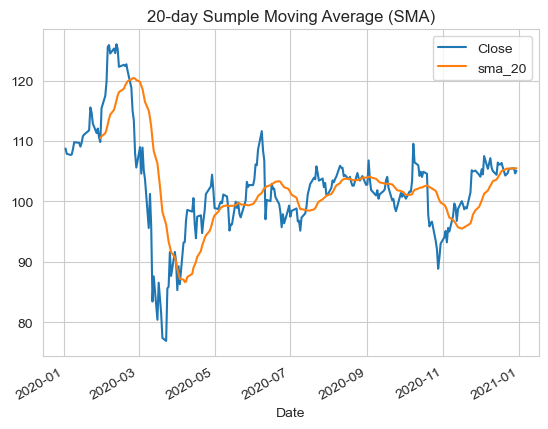

In [12]:
# Simple Moving Average
df['sma_20'] = talib.SMA(df['Close'], timeperiod=20)
(
    df[['Close', 'sma_20']]
    .plot(title='20-day Sumple Moving Average (SMA)')
)

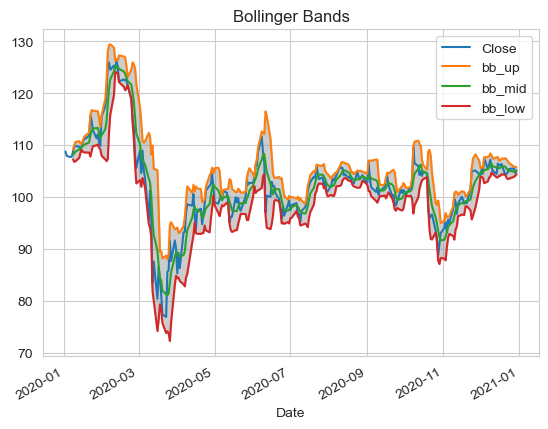

In [13]:
# plot the bollinvers bands
df['bb_up'], df['bb_mid'], df['bb_low'] = talib.BBANDS(df['Close'])

fig, ax = plt.subplots()

(
    df.loc[:, ['Close', 'bb_up', 'bb_mid', 'bb_low']]
    .plot(ax=ax, title='Bollinger Bands')
)

ax.fill_between(df.index, df['bb_up'], df['bb_low'], 
                color='grey', alpha=.4)

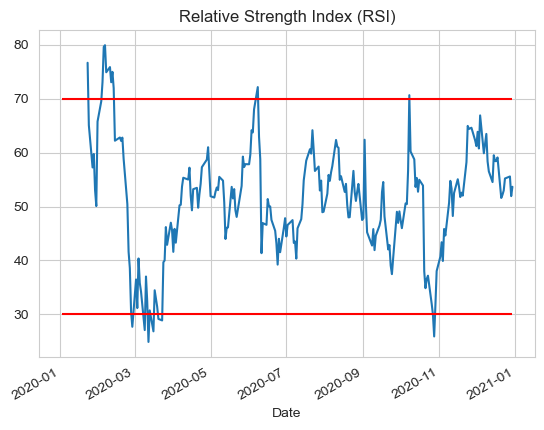

In [14]:
df['rsi'] = talib.RSI(df['Close'])
fig, ax = plt.subplots()
df['rsi'].plot(ax=ax,
               title='Relative Strength Index (RSI)')

ax.hlines(y=30,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color='red')

ax.hlines(y=70,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color='red')
plt.show()

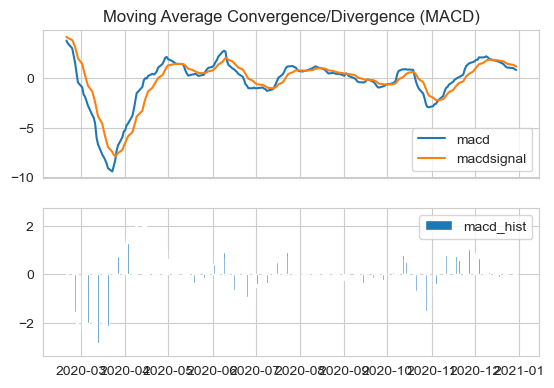

In [15]:
# MACD
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'],
                                                          fastperiod=12,
                                                          slowperiod=26,
                                                          signalperiod=9)
fig, ax = plt.subplots(2, 1, sharex=True)
(
    df[['macd', 'macdsignal']]
    .plot(ax=ax[0],
          title='Moving Average Convergence/Divergence (MACD)')
)
ax[1].bar(df.index, df['macdhist'].values, label='macd_hist')
ax[1].legend() 